In [2]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/sdotson/OneDrive - Union of Concerned Scientists/Documents/Analysis/metadata-resstock.tsv', 
                 sep='\t')

In [4]:
df.columns.to_list()

['Unnamed: 0',
 'bldg_id',
 'in.county',
 'in.puma',
 'in.ashrae_iecc_climate_zone_2004',
 'in.building_america_climate_zone',
 'in.iso_rto_region',
 'applicability',
 'weight',
 'in.sqft',
 'in.ahs_region',
 'in.applicable',
 'in.bathroom_spot_vent_hour',
 'in.bedrooms',
 'in.cec_climate_zone',
 'in.ceiling_fan',
 'in.census_division',
 'in.census_division_recs',
 'in.census_region',
 'in.clothes_dryer',
 'in.clothes_washer',
 'in.clothes_washer_presence',
 'in.cooking_range',
 'in.cooling_setpoint',
 'in.cooling_setpoint_has_offset',
 'in.cooling_setpoint_offset_magnitude',
 'in.cooling_setpoint_offset_period',
 'in.corridor',
 'in.dehumidifier',
 'in.dishwasher',
 'in.door_area',
 'in.doors',
 'in.ducts',
 'in.eaves',
 'in.electric_vehicle',
 'in.geometry_attic_type',
 'in.geometry_building_horizontal_location_mf',
 'in.geometry_building_horizontal_location_sfa',
 'in.geometry_building_level_mf',
 'in.geometry_building_number_units_mf',
 'in.geometry_building_number_units_sfa',
 'in

In [5]:
df= df.loc[df.loc[:,'in.state_name']=='Kansas']

In [6]:
wyandotte = df.loc[df.loc[:,'in.county']=='G2002090']


Filter out the buildings with more than 20 units. I don't believe there are any in Armourdale.

In [7]:
bldg_types = {'Single-Family Detached':'single-family_detached',
 'Single-Family Attached':'single-family_attached',
 '5 to 9 Unit':'multi-family_with_5plus_units',
 '50 or more Unit':'multi-family_with_5plus_units',
 '3 or 4 Unit':'multi-family_with_2_-_4_units',
 '20 to 49 Unit':'multi-family_with_5plus_units',
 '10 to 19 Unit':'multi-family_with_5plus_units',
 'Mobile Home':'mobile_home',
 '2 Unit':'multi-family_with_2_-_4_units',
 '<1940':'1939 >',
 }

LEAD DATA

In [8]:
state_abbr = "KS"
dataset = f"../data/spatial_data/armourdale_lead.csv"
lead_df = pd.read_csv(dataset)

In [9]:
bldg_types_lead = {'1 ATTACHED':"single-family_attached", 
'1 DETACHED':"single-family_detached",
'2 UNIT':"multi-family_with_2_-_4_units",
'3-4 UNIT':"multi-family_with_2_-_4_units",
'50+ UNIT':"multi-family_with_5plus_units",
'MOBILE_TRAILER':"mobile_home",
'BEFORE 1940':'1939 >'}

In [10]:
lead_df = lead_df.replace(bldg_types_lead)

In [11]:
ybl_bld_grouped = lead_df.groupby(['YBL6', 'BLD']).sum(numeric_only=True)[['UNITS', 'ELEP*UNITS', 'GASP*UNITS','HINCP*UNITS']]

In [12]:
ybl_bld_grouped[['UNITS']]

UNITS
YBL6    BLD                                      
1939 >  mobile_home                     12.197597
        multi-family_with_2_-_4_units   22.404520
        single-family_attached           5.897407
        single-family_detached         240.519377
1940-59 multi-family_with_2_-_4_units   14.140583
        single-family_attached           9.528065
        single-family_detached         329.987636
1960-79 multi-family_with_2_-_4_units   15.135973
        single-family_attached           4.570091
        single-family_detached          67.676301
1980-99 mobile_home                      5.397922
        single-family_attached           2.487823
        single-family_detached          26.728819
2000-09 multi-family_with_5plus_units    4.650487
        single-family_attached           3.823413
        single-family_detached          14.853985

In [13]:
wyandotte['in.vintage_acs'].value_counts()

1960-79    90
1940-59    77
<1940      55
1980-99    32
2000-09    21
2010s       3
Name: in.vintage_acs, dtype: int64

In [14]:
ybl_bld_grouped_resstock = wyandotte.replace(bldg_types).pivot_table(index=['in.vintage_acs','in.geometry_building_type_acs'],
                      columns=['in.county'],
                      values='bldg_id',
                      aggfunc='count')

In [15]:
ybl_bld_grouped_resstock.index.names = ['YBL6','BLD']

In [16]:
weighted_building_models = pd.concat([ybl_bld_grouped_resstock, ybl_bld_grouped[['UNITS']]], axis=1).fillna(0)

In [17]:
weighted_building_models

G2002090       UNITS
YBL6    BLD                                                
1939 >  multi-family_with_2_-_4_units       2.0   22.404520
        multi-family_with_5plus_units       3.0    0.000000
        single-family_attached              3.0    5.897407
        single-family_detached             47.0  240.519377
1940-59 multi-family_with_2_-_4_units       1.0   14.140583
        multi-family_with_5plus_units       6.0    0.000000
        single-family_attached              5.0    9.528065
        single-family_detached             65.0  329.987636
1960-79 mobile_home                         3.0    0.000000
        multi-family_with_2_-_4_units       7.0   15.135973
        multi-family_with_5plus_units      19.0    0.000000
        single-family_attached              9.0    4.570091
        single-family_detached             52.0   67.676301
1980-99 mobile_home                         3.0    5.397922
        multi-family_with_2_-_4_units       1.0    0.000000
        multi-family_with_5plus_units       8.0    0.000000
        single-family_attached              3.0    2.487823
        single-family_detached             17.0   26.728819
2000-09 mobile_home                         1.0    0.000000
        multi-family_with_2_-_4_units       1.0    0.000000
        multi-family_with_5plus_units       2.0    4.650487
        single-family_attached              3.0    3.823413
        single-family_detached             14.0   14.853985
2010s   multi-family_with_5plus_units       1.0    0.000000
        single-family_detached              2.0    0.000000
1939 >  mobile_home                         0.0   12.197597

In [18]:
armourdale = wyandotte.loc[(wyandotte['in.geometry_building_type_acs']=='Single-Family Detached') & (wyandotte['in.sqft'] < 1500)]

In [19]:
armourdale = armourdale.replace(bldg_types)

In [20]:
building_ids = armourdale.set_index(['in.vintage_acs','in.geometry_building_type_acs',])[['bldg_id']]

In [21]:
test_buildings = building_ids.xs(('1939 >','single-family_detached')).values.flatten()

C:\Users\sdotson\AppData\Local\Temp\ipykernel_6600\1869341699.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  test_buildings = building_ids.xs(('1939 >','single-family_detached')).values.flatten()


In [22]:
from tqdm import tqdm

In [23]:
frames = []
for bldg_id in tqdm(building_ids.values.flatten()):
    url = f"https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2021/resstock_tmy3_release_1/timeseries_individual_buildings/by_state/upgrade=0/state=KS/{bldg_id}-0.parquet"
    bld = pd.read_parquet(url)
    bld.index = pd.to_datetime(bld['timestamp'])
    bld = bld.drop(columns='timestamp')
    bld = bld[['out.electricity.total.energy_consumption']]
    bld.columns = [bldg_id]
    frames.append(bld)

100%|██████████| 64/64 [01:44<00:00,  1.64s/it]


In [24]:
combined = pd.concat(frames, axis=1)

<Axes: ylabel='kWh'>

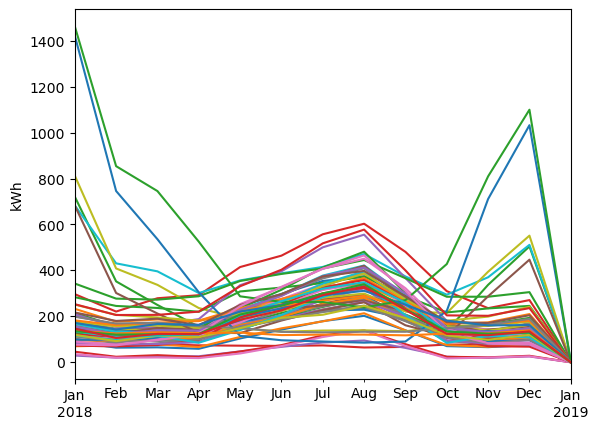

In [27]:
combined.resample('h').mean().resample('M').sum().plot(legend=False, ylabel='kWh', xlabel='')

In [211]:
bldg_id = 471403
url = f"https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2021/resstock_tmy3_release_1/timeseries_individual_buildings/by_state/upgrade=0/state=KS/{bldg_id}-0.parquet"

In [212]:
bld = pd.read_parquet(url)rraofrooaeresrrooofasdfsdfa   

In [213]:
bld.index = pd.to_datetime(bld['timestamp'])

In [214]:
bld = bld.drop(columns='timestamp')

<Axes: xlabel='timestamp'>

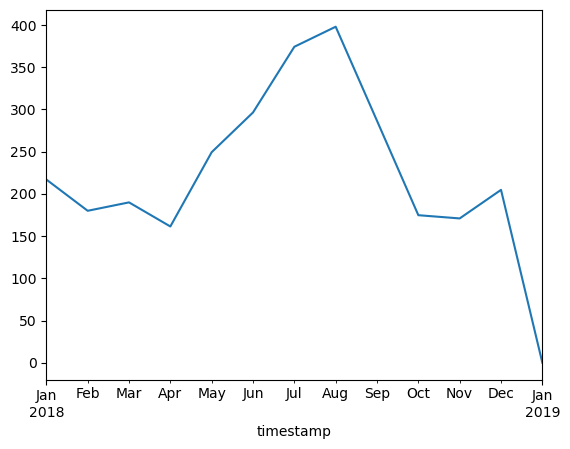

In [215]:
bld.resample('h').mean().resample('M').sum()['out.electricity.total.energy_consumption'].plot()